Total images: 20638
                                          image_path  \
0  C:\Users\Admin\Desktop\pytorch\torch_env\Plant...   
1  C:\Users\Admin\Desktop\pytorch\torch_env\Plant...   
2  C:\Users\Admin\Desktop\pytorch\torch_env\Plant...   
3  C:\Users\Admin\Desktop\pytorch\torch_env\Plant...   
4  C:\Users\Admin\Desktop\pytorch\torch_env\Plant...   
5  C:\Users\Admin\Desktop\pytorch\torch_env\Plant...   
6  C:\Users\Admin\Desktop\pytorch\torch_env\Plant...   
7  C:\Users\Admin\Desktop\pytorch\torch_env\Plant...   
8  C:\Users\Admin\Desktop\pytorch\torch_env\Plant...   
9  C:\Users\Admin\Desktop\pytorch\torch_env\Plant...   

                           label  class_id  
0  Pepper__bell___Bacterial_spot        -1  
1  Pepper__bell___Bacterial_spot        -1  
2  Pepper__bell___Bacterial_spot        -1  
3  Pepper__bell___Bacterial_spot        -1  
4  Pepper__bell___Bacterial_spot        -1  
5  Pepper__bell___Bacterial_spot        -1  
6  Pepper__bell___Bacterial_spot        -1  
7  

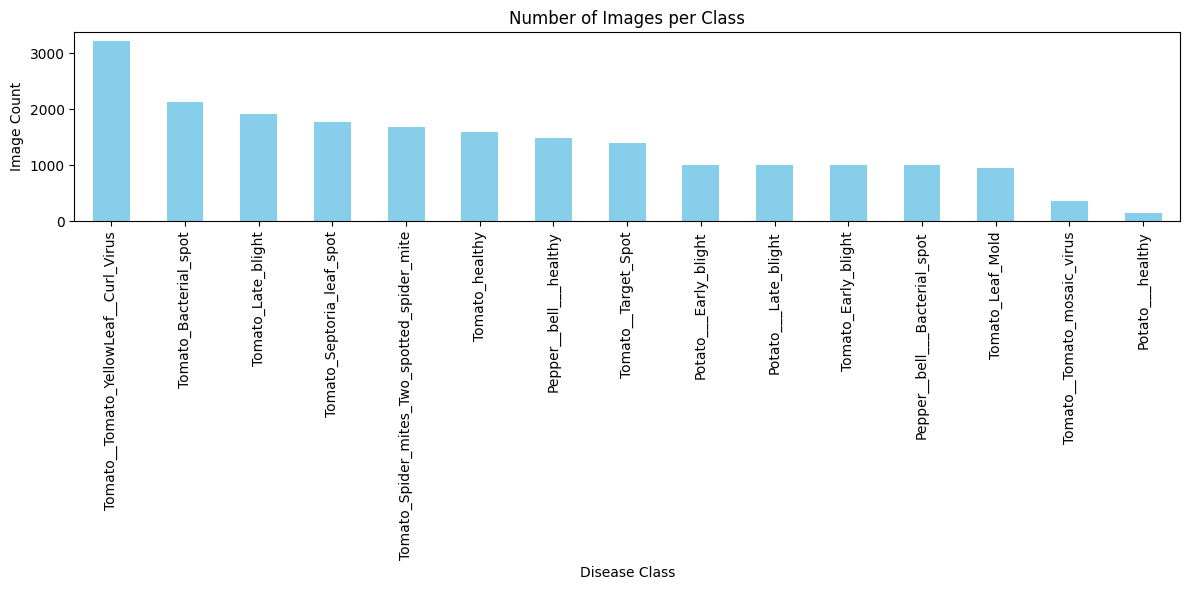

In [5]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
# Change this to your exact folder path
dataset_root = r"C:\Users\Admin\Desktop\pytorch\torch_env\PlantVillage"

# Walk through all folders and collect image paths + labels
data = []

for root, dirs, files in os.walk(dataset_root):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            full_path = os.path.join(root, file)
            # Label is the folder name
            label = os.path.basename(root)
            data.append({
                'image_path': full_path,
                'label': label,
                'class_id': -1  # we will map later
            })

# Create DataFrame
df = pd.DataFrame(data)

print("Total images:", len(df))
print(df.head(10))
print("\nUnique classes:", df['label'].nunique())
print(df['label'].value_counts().head(15))


# Your df from earlier code
# If not already created, run the collection code again first

# 1. Class distribution sorted
class_counts = df['label'].value_counts().sort_values(ascending=False)
print("Sorted class counts:")
print(class_counts)

# 2. Percentage per class
total = len(df)
class_percent = (class_counts / total * 100).round(2)
print("\nPercentage per class:")
print(class_percent)

# 3. Top 5 imbalanced classes
print("\nMost imbalanced classes (highest count):")
print(class_counts.head(5))

print("\nLeast imbalanced classes (lowest count):")
print(class_counts.tail(5))



plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Images per Class')
plt.xlabel('Disease Class')
plt.ylabel('Image Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()